# Filtering & Data Prep

In [1]:
import importlib
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


import preprocess as pp
import models
import engine

2024-08-26 14:35:11.863809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
importlib.reload(pp)
importlib.reload(models)
importlib.reload(engine)

<module 'engine' from '/home/das/QuantUS_Projs/QusAI/data-science/engine.py'>

In [3]:
DF_DIR = Path("/home/das/QuantUS_Projs/Prostate_Data")
BATCH_SIZE = 15
EPOCHS = 400
N_FOLDS = np.array([5,6,7,8,9,10,11,12,13,14,15]) #[1,2,3,4,5,6,7,8,9,10]

In [4]:
train_df = pd.read_pickle(DF_DIR / Path('Train_df-PS04_snapshot01.pkl'))
test_df = pd.read_pickle(DF_DIR / Path('Test_df-PS04_snapshot01.pkl'))
val_df = pd.read_pickle(DF_DIR / Path('Val_df-PS04_snapshot01.pkl'))

In [5]:
combined_df = pd.concat([train_df, test_df, val_df])
del train_df, test_df, val_df

In [6]:
#TODO: K-fold cross validation where K makes the test set be ~100 patients
len(combined_df)

7840

In [7]:
100/7480

0.013368983957219251

In [8]:
train_df, test_df = pp.patient_stratify(combined_df,0.02)
train_df, valid_df = pp.patient_stratify(train_df, 0.2)
train_df.head()

,Core,Gain,Hospital,Label,NPS,PS,PSA,Patient,PctCancer,PrimGrade,SecGrade,Name
0,LAM,41.9986103688254,UVA,GS7,[[[[-2.70518494 -2.25037724 -2.06084721 -1.959...,[[[[60.15154791 60.36170162 60.76108691 61.160...,7.1,0039,50,3,4,UVA_0039
1,LML,41.9986103688254,UVA,GS8,[[[[ 4.66726083 5.06954768 5.20350965 5.161...,[[[[67.43259991 67.60081319 67.95339132 68.215...,7.1,0039,95,4,4,UVA_0039
2,RAL,41.9986103688254,UVA,GS7,[[[[ -9.03808414 -9.16656507 -9.72089112 -10...,[[[[53.72009789 53.36318033 53.03817224 52.896...,7.1,0039,5,4,3,UVA_0039
3,RBL,41.9986103688254,UVA,GS7,[[[[ -6.78702049 -6.42993982 -7.17538448 -7...,[[[[56.01451565 56.14034354 55.63676832 55.197...,7.1,0039,30,4,3,UVA_0039
4,LMM,41.9986103688254,UVA,GS7,[[[[ -5.35521816 -5.38678529 -5.64345426 -5...,[[[[57.36596678 57.10262797 57.07647457 57.368...,7.1,0039,70,4,3,UVA_0039


In [9]:
# train_df, test_df = pp.hospital_stratify(combined_df,0.02)
# train_df, valid_df = pp.hospital_stratify(train_df, 0.2)
# train_df.head()

In [10]:
len(test_df)

154

In [11]:
del combined_df

In [12]:
x_train_4D, y_train_4D, x_valid_4D, y_valid_4D, x_test_4D, y_test_4D, pct_cancer_weights, psa_train, psa_valid, psa_test = pp.create_4D(train_df, valid_df, test_df, 'PS', sub_gain=0)

100%|██████████| 154/154 [00:00<00:00, 1745737.34it/s]


In [13]:
del train_df, valid_df, test_df

In [14]:
x_test_4D, y_test_4D, psa_test = pp.filter_data(x_test_4D, y_test_4D, psa_test, mask_thresh=0)

In [15]:
x_train_4D = pp.data_norm_stand(x_train_4D)
x_valid_4D = pp.data_norm_stand(x_valid_4D)
x_test_4D = pp.data_norm_stand(x_test_4D)

In [16]:
Xa, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'a')
Xb, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'b')
Xc, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'c')
Xd, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'d')
Xe, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'e')
Xf, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'f')
Xg, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'g')
Xh, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'h')
Xi, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'i')
x_train = [Xa,Xb,Xc,Xd,Xe,Xf,psa_train]
y_train = Y

Xva, Yv = pp.resample_augment(x_valid_4D, Xa, y_valid_4D,'a')
Xvb, Yv = pp.resample_augment(x_valid_4D, Xb, y_valid_4D,'b')
Xvc, Yv = pp.resample_augment(x_valid_4D, Xc, y_valid_4D,'c')
Xvd, Yv = pp.resample_augment(x_valid_4D, Xd, y_valid_4D,'d')
Xve, Yv = pp.resample_augment(x_valid_4D, Xe, y_valid_4D,'e')
Xvf, Yv = pp.resample_augment(x_valid_4D, Xf, y_valid_4D,'f')
Xvg, Yv = pp.resample_augment(x_valid_4D, Xg, y_valid_4D,'g')
Xvh, Yv = pp.resample_augment(x_valid_4D, Xh, y_valid_4D,'h')
Xvi, Yv = pp.resample_augment(x_valid_4D, Xi, y_valid_4D,'i')
x_valid = [Xva,Xvb,Xvc,Xvd,Xve,Xvf,psa_valid]
y_valid = Yv

Xta, Yt = pp.resample_augment(x_test_4D, Xa, y_test_4D,'a')
Xtb, Yt = pp.resample_augment(x_test_4D, Xb, y_test_4D,'b')
Xtc, Yt = pp.resample_augment(x_test_4D, Xc, y_test_4D,'c')
Xtd, Yt = pp.resample_augment(x_test_4D, Xd, y_test_4D,'d')
Xte, Yt = pp.resample_augment(x_test_4D, Xe, y_test_4D,'e')
Xtf, Yt = pp.resample_augment(x_test_4D, Xf, y_test_4D,'f')
Xtg, Yt = pp.resample_augment(x_test_4D, Xg, y_test_4D,'g')
Xth, Yt = pp.resample_augment(x_test_4D, Xh, y_test_4D,'h')
Xti, Yt = pp.resample_augment(x_test_4D, Xi, y_test_4D,'i')
x_test = [Xta,Xtb,Xtc,Xtd,Xte,Xtf,psa_test]
y_test = Yt


In [17]:
del Xa, Xb, Xc, Xd, Xe, Xf, Xg, Xh, Xi, Y
del Xva, Xvb, Xvc, Xvd, Xve, Xvf, Xvg, Xvh, Xvi, Yv
del Xta, Xtb, Xtc, Xtd, Xte, Xtf, Xtg, Xth, Xti
del x_train_4D, y_train_4D, x_valid_4D, y_valid_4D, x_test_4D, y_test_4D

# Training

In [18]:
workdir = "/home/das/QuantUS_Projs/QusAI/data-science/"
log_dir = Path("/home/das/QuantUS_Projs/QusAI/data-science/logs/")
batch_size = 32
epochs = 400
nFold = np.array([5,6,7,8,9,10,11,12,13,14,15])

In [19]:
import gc
gc.collect()

8

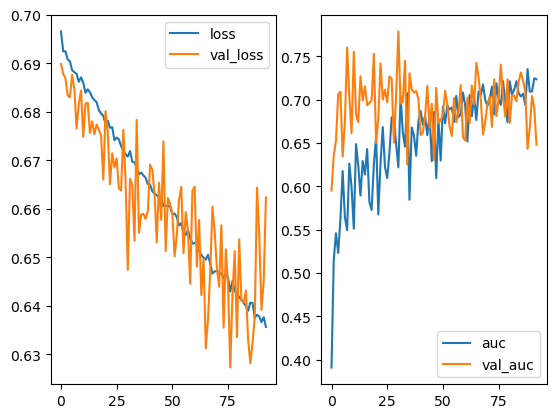

192/192 [==============================] - 10s 51ms/step - loss: 0.6356 - auc: 0.7236 - val_loss: 0.6623 - val_auc: 0.6480 - lr: 1.0000e-06
Epoch 94/400
141/192 [=====================>........] - ETA: 2s - loss: 0.6370 - auc: 0.6863

KeyboardInterrupt: 

In [20]:
import utils
importlib.reload(utils)
importlib.reload(models)
importlib.reload(engine)

from multiprocessing import Pool
# 2 zeros removed
# classic overfitting at 60/40 --> good-ish

full_model = models.model_3d_00(x_train[0], y_train, psa_train, workdir)
full_model, history = engine.train_model(full_model, x_train, y_train, x_valid, y_valid, batch_size, epochs, pct_cancer_weights, log_dir) #0.0008 ,Xe,Xf,,Xve,Xvf

In [21]:
from evaluation import evaluate_acc_thresholds, evaluate_model

In [22]:
import keras

from models import SqueezeLayer

custom_objects = {'SqueezeLayer': SqueezeLayer }

best_model = keras.models.load_model("best_model.keras", custom_objects=custom_objects)

In [23]:
evaluate_acc_thresholds(full_model, x_test, y_test)


5/5 [==============================] - 0s 55ms/step
best thresh: 0.35000000000000003
5/5 [==============================] - 0s 14ms/step
[[  2  12]
 [  0 140]]
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25        14
         1.0       0.92      1.00      0.96       140

    accuracy                           0.92       154
   macro avg       0.96      0.57      0.60       154
weighted avg       0.93      0.92      0.89       154

#############################


###########################
###########################
Loss: 0.586066484451294
Accuracy: 0.8031497597694397
5/5 [==============================] - 0s 14ms/step
thresh: 0.35
[[  2  12]
 [  0 140]]
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25        14
         1.0       0.92      1.00      0.96       140

    accuracy                           0.92       154
   macro avg       0.96      0.57      0.60       154
weighted avg       0.93      0.92      0.89       154

Balanced ACC: 0.5714285714285714
AUC: 0.6826530612244898
pAUC: 0.6619047619047619
microAUC: 0.6826530612244898
macroAUC: 0.6826530612244898
wAUC: 0.6826530612244898
sAUC: 0.6826530612244898

5/5 [==============================] - 0s 14ms/step
best thresh: 0.35000000000000003
5/5 [==============================] - 0s 13ms/step
[[  2  12]
 [  0 140]]
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25        14
         1.0    

(0.6826530612244898,
 0.958904109589041,
 0.25,
 array([[  2,  12],
        [  0, 140]]))

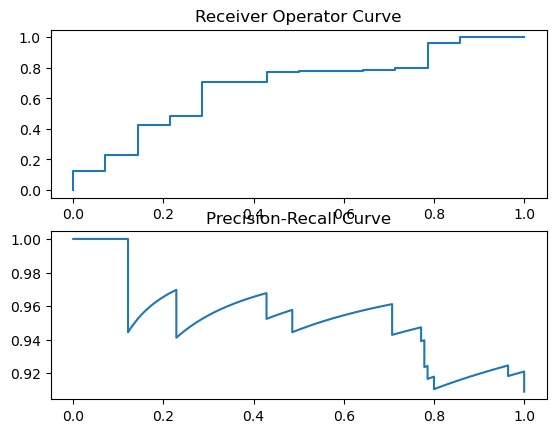

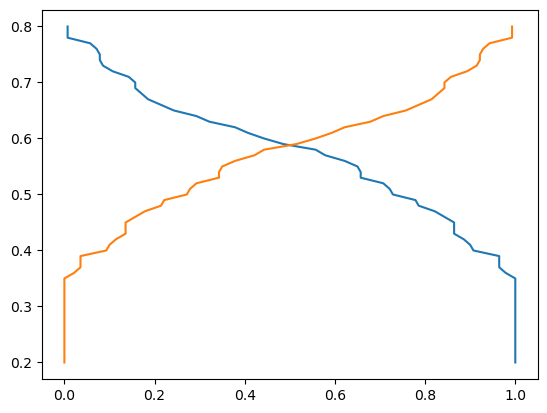

In [24]:
fig, (ax1, ax2) = plt.subplots(2)

evaluate_model(full_model, x_test, y_test, ax1, ax2, 0.35)

In [28]:
best_model.evaluate(x_test, y_test, verbose=1)

/home/das/miniconda3/envs/tensorflow-gpu-env/lib/python3.10/site-packages/keras/utils/generic_utils.py:239: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [29]:
y_test

array([], shape=(0, 2), dtype=float32)